# 🎯 Web Scraping Books Data using Python | CodeAlpha Data Analytics Task 1

WEB SCRAPING BOOKS DATA USING PYTHON - CodeAlpha Internship Task1

📘 Starting to scrape book data...
Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...

✅ Data scraped successfully!
                                   Title    Price Rating Availability
0                   A Light in the Attic  Â£51.77  Three     In stock
1                     Tipping the Velvet  Â£53.74    One     In stock
2                             Soumission  Â£50.10    One     In stock
3                          Sharp Objects  Â£47.82   Four     In stock
4  Sapiens: A Brief History of Humankind  Â£54.23   Five     In stock

💾 Dataset saved as 'books_to_scrape_dataset.csv'

📊 Basic Insights:
Total books scraped: 100
Average Price: £34.56
Highest Price: £58.11
Lowest Price: £10.16

💰 Top 5 Most Expensive Books:
                                                Title  Price  Rating
68       The Death of Humanity: and the Case for Life  58.11       4
40                     Slo

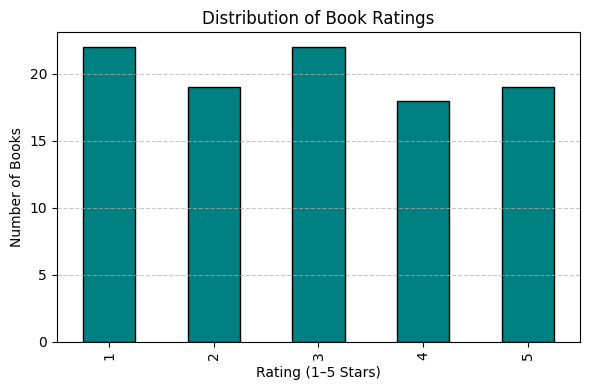

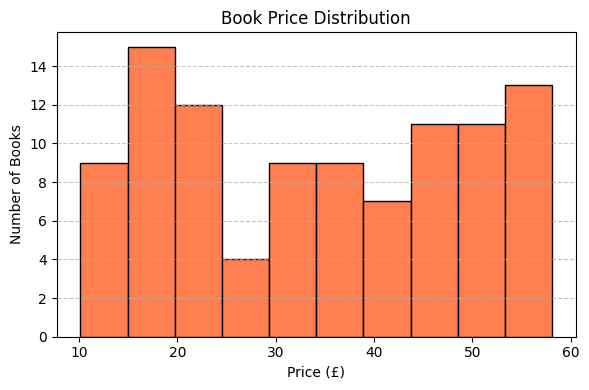


✅ Project Completed Successfully!


In [19]:
# ======================================================
# CODEALPHA INTERNSHIP — DATA ANALYTICS
# TASK 1: WEB SCRAPING BOOKS DATA USING PYTHON
# Website: https://books.toscrape.com/
# ======================================================

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep

# ------------------------------------------------------
# Step 1: Setup
# ------------------------------------------------------
base_url = "https://books.toscrape.com/catalogue/page-{}.html"
all_books = []

# -------------------------------------------
# Output Title
# -------------------------------------------
print("="*65)
print("WEB SCRAPING BOOKS DATA USING PYTHON - CodeAlpha Internship Task1")
print("="*65)




print("\n📘 Starting to scrape book data...")

# ------------------------------------------------------
# Step 2: Loop through multiple pages (1 to 5 for demo)
# ------------------------------------------------------
for page in range(1, 6):  # You can increase pages if needed
    print(f"Scraping page {page}...")
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # --------------------------------------------------
    # Step 3: Extract book information from each product
    # --------------------------------------------------
    for item in soup.find_all("article", class_="product_pod"):
        title = item.h3.a["title"]
        price = item.find("p", class_="price_color").text.strip()
        rating = item.p["class"][1]  # e.g., "One", "Two", etc.
        availability = item.find("p", class_="instock availability").text.strip()

        all_books.append({
            "Title": title,
            "Price": price,
            "Rating": rating,
            "Availability": availability
        })

    # Optional: Be polite (avoid hammering server)
    sleep(1)

# ------------------------------------------------------
# Step 4: Convert data into DataFrame
# ------------------------------------------------------
df = pd.DataFrame(all_books)
print("\n✅ Data scraped successfully!")
print(df.head())



# ------------------------------------------------------
# Step 5: Clean and process data
# ------------------------------------------------------
# Remove encoding artifacts and convert to float
df["Price"] = (
    df["Price"]
    .str.replace("Â", "", regex=False)
    .str.replace("£", "", regex=False)
    .astype(float)
)

# Map text ratings to numeric values
rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
df["Rating"] = df["Rating"].map(rating_map)


# ------------------------------------------------------
# Step 6: Save dataset
# ------------------------------------------------------
df.to_csv("books_to_scrape_dataset.csv", index=False)
print("\n💾 Dataset saved as 'books_to_scrape_dataset.csv'")

# ------------------------------------------------------
# Step 7: Data Analysis & Visualization
# ------------------------------------------------------
print("\n📊 Basic Insights:")
print(f"Total books scraped: {len(df)}")
print(f"Average Price: £{df['Price'].mean():.2f}")
print(f"Highest Price: £{df['Price'].max():.2f}")
print(f"Lowest Price: £{df['Price'].min():.2f}")

# Top 5 most expensive books
print("\n💰 Top 5 Most Expensive Books:")
print(df.nlargest(5, "Price")[["Title", "Price", "Rating"]])

# Rating distribution
plt.figure(figsize=(6,4))
df["Rating"].value_counts().sort_index().plot(kind="bar", color="teal", edgecolor="black")
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating (1–5 Stars)")
plt.ylabel("Number of Books")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Price distribution
plt.figure(figsize=(6,4))
plt.hist(df["Price"], bins=10, color="coral", edgecolor="black")
plt.title("Book Price Distribution")
plt.xlabel("Price (£)")
plt.ylabel("Number of Books")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

print("\n✅ Project Completed Successfully!")
